In [2]:
pip install pandas-datareader

     ------------------------------------ 109.5/109.5 kB 708.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Data Collection
import pandas_datareader as pdr

In [4]:
#key = get your key from tiingo

In [5]:
df= pdr.get_data_tiingo('AAPL',api_key=key)

C:\Users\shikh\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [7]:
df.to_csv('AAPL.csv')

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [9]:
df=pd.read_csv('AAPL.csv')

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-05-13 00:00:00+00:00,185.72,189.48,182.85,187.71,57430623,44.810058,45.717261,44.117591,45.290200,229722492,0.0,1.0
1,AAPL,2019-05-14 00:00:00+00:00,188.66,189.70,185.41,186.41,36529677,45.519414,45.770342,44.735262,44.976539,146118708,0.0,1.0
2,AAPL,2019-05-15 00:00:00+00:00,190.92,191.75,186.02,186.27,26544718,46.064701,46.264961,44.882441,44.942761,106178872,0.0,1.0
3,AAPL,2019-05-16 00:00:00+00:00,190.08,192.47,188.84,189.91,33031364,45.862028,46.438681,45.562844,45.821011,132125456,0.0,1.0
4,AAPL,2019-05-17 00:00:00+00:00,189.00,190.90,186.76,186.93,32879090,45.601448,46.059875,45.060987,45.102004,131516360,0.0,1.0


In [13]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2024-05-06 00:00:00+00:00,181.71,184.20,180.42,182.354,78569667,181.462169,183.948773,180.173928,182.105290,78569667,0.00,1.0
1255,AAPL,2024-05-07 00:00:00+00:00,182.40,184.90,181.32,183.450,77305771,182.151227,184.647818,181.072700,183.199795,77305771,0.00,1.0
1256,AAPL,2024-05-08 00:00:00+00:00,182.74,183.07,181.45,182.850,45057087,182.490764,182.820314,181.202523,182.600614,45057087,0.00,1.0
1257,AAPL,2024-05-09 00:00:00+00:00,184.57,184.66,182.11,182.560,48982972,184.318268,184.408145,181.861623,182.311009,48982972,0.00,1.0
1258,AAPL,2024-05-10 00:00:00+00:00,183.05,185.09,182.13,184.900,50759496,183.050000,185.090000,182.130000,184.900000,50759496,0.25,1.0


In [16]:
df1= df.reset_index()['close']

In [22]:
df1[1238:]

1238    176.55
1239    172.69
1240    169.38
1241    168.00
1242    167.04
1243    165.00
1244    165.84
1245    166.90
1246    169.02
1247    169.89
1248    169.30
1249    173.50
1250    170.33
1251    169.30
1252    173.03
1253    183.38
1254    181.71
1255    182.40
1256    182.74
1257    184.57
1258    183.05
Name: close, dtype: float64

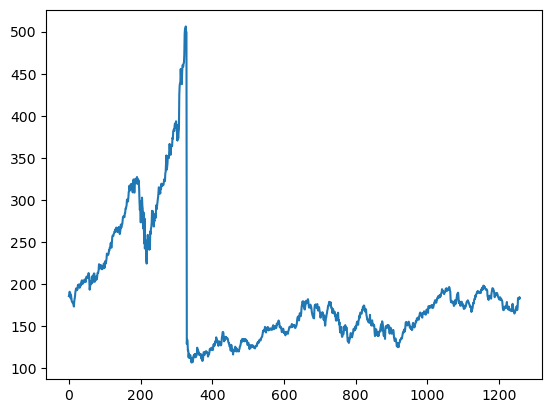

In [21]:
plt.plot(df1)

LSTM are sensitive to the scale of the data. so we apply MinMax scaler 


In [24]:
df1

0       185.72
1       188.66
2       190.92
3       190.08
4       189.00
         ...  
1254    181.71
1255    182.40
1256    182.74
1257    184.57
1258    183.05
Name: close, Length: 1259, dtype: float64

In [26]:
scaler= MinMaxScaler(feature_range=(0,1))
df1 =scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
df1

array([[0.19757044],
       [0.20493425],
       [0.21059487],
       ...,
       [0.19010645],
       [0.19469004],
       [0.19088291]])

In [28]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(818, 441)

In [30]:
train_data

array([[1.97570445e-01],
       [2.04934252e-01],
       [2.10594865e-01],
       [2.08490920e-01],
       [2.05785848e-01],
       [1.90983093e-01],
       [1.99774577e-01],
       [1.90206637e-01],
       [1.82391985e-01],
       [1.80663745e-01],
       [1.78810269e-01],
       [1.76681277e-01],
       [1.78985598e-01],
       [1.70895429e-01],
       [1.66462116e-01],
       [1.82341891e-01],
       [1.89605510e-01],
       [1.96318096e-01],
       [2.08666249e-01],
       [2.14752661e-01],
       [2.20338134e-01],
       [2.18785222e-01],
       [2.18685034e-01],
       [2.15153413e-01],
       [2.18033813e-01],
       [2.29455229e-01],
       [2.28002505e-01],
       [2.31984972e-01],
       [2.30281778e-01],
       [2.29780839e-01],
       [2.22241703e-01],
       [2.32836569e-01],
       [2.32686287e-01],
       [2.28127740e-01],
       [2.37219787e-01],
       [2.40175329e-01],
       [2.44383219e-01],
       [2.43932373e-01],
       [2.33387602e-01],
       [2.36443331e-01],


In [31]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [34]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 253ms/step - loss: 0.0480 - val_loss: 0.0041
Epoch 2/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0132 - val_loss: 4.3185e-04
Epoch 3/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0112 - val_loss: 3.2858e-04
Epoch 4/100
12/12 [==============================] - 2s 156ms/step - loss: 0.0092 - val_loss: 2.1363e-04
Epoch 5/100
12/12 [==============================] - 2s 148ms/step - loss: 0.0085 - val_loss: 2.2057e-04
Epoch 6/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0074 - val_loss: 4.6408e-04
Epoch 7/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0066 - val_loss: 5.1748e-04
Epoch 8/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0057 - val_loss: 2.3603e-04
Epoch 9/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0057 - val_loss: 3.3082e-04
Epoch 10/100
12/12 [==============================] - 2s 1

In [40]:
import tensorflow as tf

In [41]:
tf.__version__

'2.13.0'

In [42]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 24ms/step


In [43]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [44]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

213.70142400168623

In [45]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

175.3837766577704

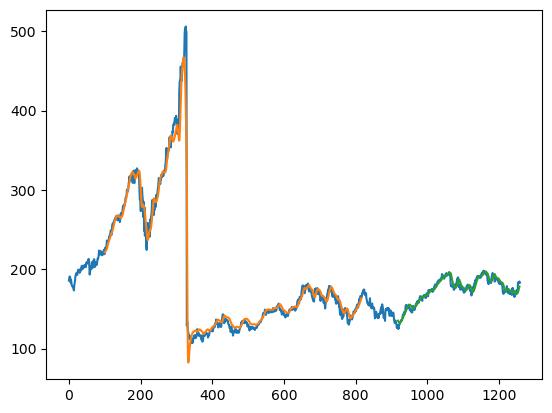

In [46]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
len(test_data)

441

In [48]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.22304320601127103,
 0.22567313713212267,
 0.2203882279273638,
 0.22001252348152783,
 0.21730745147150904,
 0.21592986850344392,
 0.21618033813400123,
 0.2172573575453976,
 0.21462742642454596,
 0.19737006887914832,
 0.19388854101440195,
 0.18802755165936125,
 0.18619912335629302,
 0.1971696931747025,
 0.19611772072636185,
 0.1987476518472135,
 0.19724483406386972,
 0.19807138384470874,
 0.19233562930494674,
 0.18995616781465247,
 0.20485911083281144,
 0.21219787100814025,
 0.21803381340012518,
 0.2212648716343143,
 0.21956167814652466,
 0.2187351283656856,
 0.21435190983093294,
 0.2126236693800876,
 0.2033813400125234,
 0.1942642454602379,
 0.2004257983719474,
 0.19789605510331865,
 0.20247964934251717,
 0.20653725735754536,
 0.20681277395115838,
 0.20408265497808387,
 0.2054101440200375,
 0.20115216030056354,
 0.19586725109580455,
 0.1936380713838447,
 0.19291170945522856,
 0.18902943018159046,
 0.18715090795241074,
 0.18905447714464613,
 0.19418910457107075,
 0.1895554164057608,
 

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.18725756]
101
1 day input [0.22567314 0.22038823 0.22001252 0.21730745 0.21592987 0.21618034
 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755 0.18619912
 0.19716969 0.19611772 0.19874765 0.19724483 0.19807138 0.19233563
 0.18995617 0.20485911 0.21219787 0.21803381 0.22126487 0.21956168
 0.21873513 0.21435191 0.21262367 0.20338134 0.19426425 0.2004258
 0.19789606 0.20247965 0.20653726 0.20681277 0.20408265 0.20541014
 0.20115216 0.19586725 0.19363807 0.19291171 0.18902943 0.18715091
 0.18905448 0.1941891  0.18955542 0.18614903 0.18983093 0.18680025
 0.1851221  0.18239198 0.17097057 0.15849718 0.15599249 0.15569192
 0.16002505 0.16508453 0.16628679 0.16102693 0.16571071 0.16475892
 0.16751409 0.17342517 0.17991234 0.16162805 0.16390733 0.16032561
 0.15747026 0.16648716 0.16190357 0.15827176 0.15529117 0.15731997
 0.15524108 0.15714465 0.15431434 0.15737007 0.15263619 0.17082029
 0.17460238 0.16493425 0.15664371 0.15318723 0.15078272 0.14567314
 0.14777708 0.15043206 0.15574202 

In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
len(df1)

1259

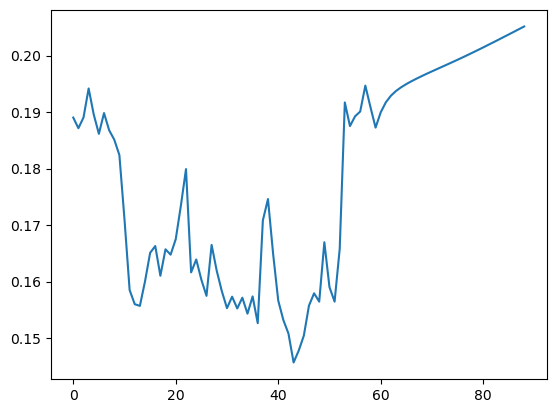

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [57]:
df3=scaler.inverse_transform(df3).tolist()

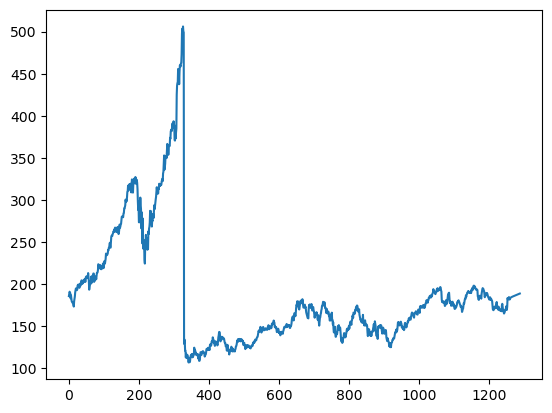

In [58]:
plt.plot(df3)